<a href="https://colab.research.google.com/github/akeelrashid/ML-Retail-Sales-Prediction-Project-/blob/main/ML_Regression_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Retail Sales Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual
**Akeel Rashid**


# **Project Summary -**

I have been provided with historical sales data for 1,115 Rossmann stores.My task is to forecast the sales and it has been mentioned that some of the store were temporarily closed for rebursment during that period sales were 0.
Firstly i imported and clased the data

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**



Rossmann operates over 3,000 drug stores in 7 European Countries.Currently,Rossmann store managers are tasked with predicting their daily sales for upto six weeks in advance.Store sales are influenced by many factors,including promotions,competition,school and state holidays,seasonality,and loclity.With thousands of individual managers predicting sales based on their unique circumstance the accuracy of result can be quite varied.You are provided with historical sales data for 1,115 Rossmann stores.The task is to forecast the 'Sales' column for the test set.Note that some stores in the dataset were temporarily closed for reburisment

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import math
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
#Mouting Google drive with colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
ross_store=pd.read_csv('/content/drive/MyDrive/Data Science/Machine Learning/Regression Capstone Project/Rossmann Stores Data.csv')

In [ ]:
store=pd.read_csv('/content/drive/MyDrive/Data Science/Machine Learning/Regression Capstone Project/store.csv')

### Dataset First View

In [ ]:
# Dataset First Look
ross_store.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [ ]:
#dataset first look
store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

### Dataset Rows & Columns count

In [ ]:
# ross_store Dataset Rows & Columns count
print(f'Shape of dataset is :{ross_store.shape}')
print(f'Our dataset contains {ross_store.index.value_counts().sum()} Columns')
print(f'Our dataset contains {ross_store.columns.value_counts().sum()} Rows')


Shape of dataset is :(1017209, 9)
Our dataset contains 1017209 Columns
Our dataset contains 9 Rows


In [ ]:
#store data set Rows & column count
print(f'Shape of dataset is :{store.shape}')
print(f'Our dataset contains {store.index.value_counts().sum()} Columns')
print(f'Our dataset contains {store.columns.value_counts().sum()} Rows')

Shape of dataset is :(1115, 10)
Our dataset contains 1115 Columns
Our dataset contains 10 Rows


### Dataset Information

In [ ]:
# ross_store Dataset Info
ross_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


**Points to be noted:**
* Ross store dataset does not contain any null value
* Date and StateHoliday dtype is object


In [ ]:
#store dataset info
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


**Points to be noted**
* There are many null values present in this dataset
* StoreType and Assortment has object datatype


#### Duplicate Values

In [ ]:
# ross_store Dataset Duplicate Value Count
ross_store.duplicated().sum()

0

Ross_store dataset doesn't contain any duplicate value

In [ ]:
# store Dataset Duplicate Value Count
store.duplicated().sum()

0

Store dataset doesn't contain any duplicated values



#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
ross_store.isnull().sum().sort_values(ascending=False)

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

ross_store dataset doesn't contains any null values

In [ ]:
# Missing Values/Null Values Count
store.isnull().sum().sort_values(ascending=False)

Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
CompetitionDistance            3
Store                          0
StoreType                      0
Assortment                     0
Promo2                         0
dtype: int64

There are too many columns which contain null values

In [ ]:
#describe the dataset
pd.set_option('display.float_format', lambda x: '%.0f' % x)
percentiles = [0.01, 0.25, 0.5, 0.75, 0.95,0.99]
ross_store.describe(percentiles=percentiles)

Store  DayOfWeek   Sales  Customers    Open   Promo  SchoolHoliday
count 1017209    1017209 1017209    1017209 1017209 1017209        1017209
mean      558          4    5774        633       1       0              0
std       322          2    3850        464       0       0              0
min         1          1       0          0       0       0              0
1%         11          1       0          0       0       0              0
25%       280          2    3727        405       1       0              0
50%       558          4    5744        609       1       0              0
75%       838          6    7856        837       1       1              0
95%      1060          7   12137       1362       1       1              1
99%      1104          7   17160       2267       1       1              1
max      1115          7   41551       7388       1       1              1

There are some columns which contains outliers like Sales,customers

In [ ]:
#describe dataset
store.describe(percentiles=percentiles)

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count   1115                 1112                        761   
mean     558                 5405                          7   
std      322                 7663                          3   
min        1                   20                          1   
1%        12                   50                          1   
25%      280                  718                          4   
50%      558                 2325                          8   
75%      836                 6882                         10   
95%     1059                20145                         12   
99%     1104                35145                         12   
max     1115                75860                         12   

       CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  
count                       761    1115              571              571  
mean                       2009       1               24             2012  
std                           6       1               14                2  
min                        1900       0                1             2009  
1%                         1994       0                1             2009  
25%                        2006       0               13             2011  
50%                        2010       1               22             2012  
75%                        2013       1               37             2013  
95%                        2014       1               45             2014  
99%                        2015       1               48             2015  
max                        2015       1               50             2015

CompetitionDistance column contain outlier


* Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSinceMonth,CompetitionOpenSinceYear contains too many null values


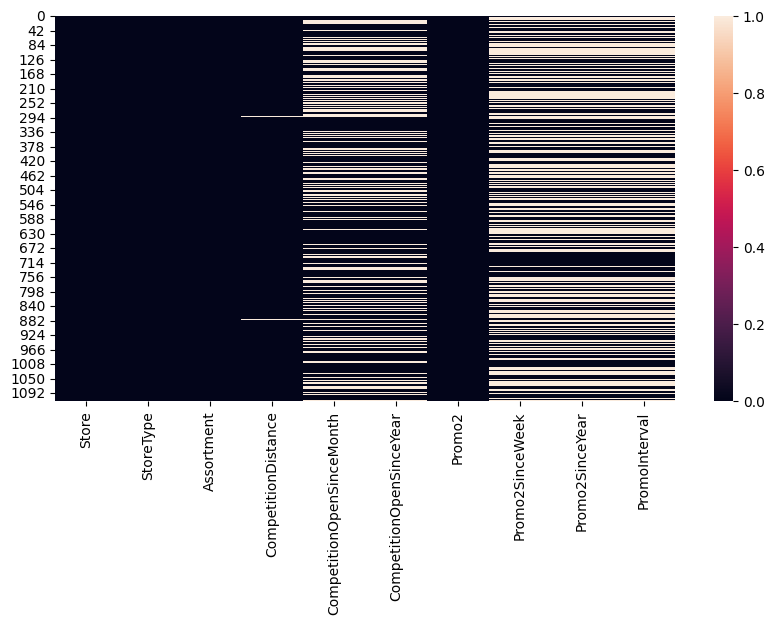

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.heatmap(store.isnull())
plt.show()

### What did you know about your dataset?

* We have a dataset of rosmann company.One dataset is roaaman store which contains **1017209** rows and **9** columns.The dataset doesn't contain any null or duplicated values.It gives us inforamation about the type of store,sales in each store by what date through how many number of customers.Also whether the sale was affected by closure of shop on weekends or or any kind of stateholiday or schoolholiday.It also gives on how sales was affected on applying promo
* The other dataset is store which has **1115** Rows and **10** Column.This dataset contains too many null values in different columns.which needs to be taken care in upcoming steps.It provides information like type of store and what is assostment level used in store,how far away is competitor from store,since how long is competitor there in the market and how often is promo applied on the store

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
ross_store.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

### Variables Description

Most of the fields are self-explanatory. The following are descriptions for those that aren't.
Store - a unique Id that represents store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open -  whether the store was open or not: 0 = closed, 1 = open

StateHoliday - state holiday or not

SchoolHoliday - SchoolHoliday or not

StoreType - what is the type of the store: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - store running consecutive promotion or not

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started a new. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_vals =ross_store.apply(lambda col: col.unique())
print(unique_vals)

Store            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
DayOfWeek                                    [5, 4, 3, 2, 1, 7, 6]
Date             [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
Sales            [5263, 6064, 8314, 13995, 4822, 5651, 15344, 8...
Customers        [555, 625, 821, 1498, 559, 589, 1414, 833, 687...
Open                                                        [1, 0]
Promo                                                       [1, 0]
StateHoliday                                       [0, a, b, c, 0]
SchoolHoliday                                               [1, 0]
dtype: object


* state holiday cotains O instead of 0(zero)

In [ ]:
unique_vals =store.apply(lambda col: col.unique())
print(unique_vals)

Store                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
StoreType                                                         [c, a, d, b]
Assortment                                                           [a, c, b]
CompetitionDistance          [1270.0, 570.0, 14130.0, 620.0, 29910.0, 310.0...
CompetitionOpenSinceMonth    [9.0, 11.0, 12.0, 4.0, 10.0, 8.0, nan, 3.0, 6....
CompetitionOpenSinceYear     [2008.0, 2007.0, 2006.0, 2009.0, 2015.0, 2013....
Promo2                                                                  [0, 1]
Promo2SinceWeek              [nan, 13.0, 14.0, 1.0, 45.0, 40.0, 26.0, 22.0,...
Promo2SinceYear              [nan, 2010.0, 2011.0, 2012.0, 2009.0, 2014.0, ...
PromoInterval                [nan, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Mar,Ju...
dtype: object


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#dropping coluns from store dataset which contains too many null values
store.drop(columns=['PromoInterval','Promo2SinceYear','Promo2SinceWeek','CompetitionOpenSinceYear','CompetitionOpenSinceMonth'],axis=1,inplace=True)

In [ ]:
#filling null values in competitiondistance column with median
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(),inplace=True)

In [ ]:
#merging both the dataset
data=ross_store.merge(store,on='Store',how='left')

In [ ]:
#first look of the merged dataset
data.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  Promo2  
0              1         c          a                 1270       0  
1              1         a          a                  570       1  
2              1         a          a                14130       1  
3              1         c          c                  620       0  
4              1         a          a                29910       0

In [ ]:
#shape of the dataset
data.shape

(1017209, 13)

In [ ]:
# creating year,month,week_num column from Date Column
data['Date']=pd.to_datetime(data['Date'])
data['year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data['week_num']=data['Date'].dt.week


In [ ]:
#dropping date column from data
data.drop(columns='Date',axis=1,inplace=True)

In [ ]:
data.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0      1          5   5263        555     1      1            0   
1      2          5   6064        625     1      1            0   
2      3          5   8314        821     1      1            0   
3      4          5  13995       1498     1      1            0   
4      5          5   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  Promo2  year  \
0              1         c          a                 1270       0  2015   
1              1         a          a                  570       1  2015   
2              1         a          a                14130       1  2015   
3              1         c          c                  620       0  2015   
4              1         a          a                29910       0  2015   

   Month  week_num  
0      7        31  
1      7        31  
2      7        31  
3      7        31  
4      7        31

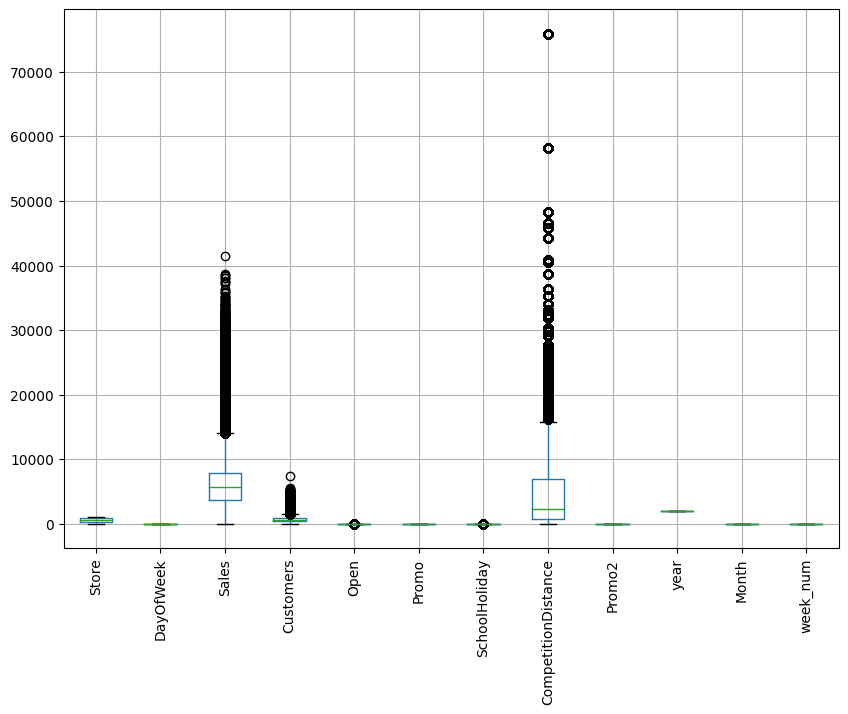

In [ ]:
#Now let's deal with the outliers
plt.figure(figsize=(10,7))
data.boxplot()
plt.xticks(rotation='vertical')
plt.show()

Columns like Sales,CompetitionDistance and customers contains Outliers
but CompetitionDistance contains maximum

In [ ]:
#find out 90,95,99 percentile values of Competition distance column
percentiles=[0.90,0.95,0.99]
data['CompetitionDistance'].describe(percentiles=percentiles)

count   1017209
mean       5422
std        7707
min          20
50%        2325
90%       15710
95%       20390
99%       36410
max       75860
Name: CompetitionDistance, dtype: float64

From this we can see that 99% value is around 36K and maximum value is around 75K,so let's consider only value around 95%

In [ ]:
#find out 90,95,99 percentile values of Sales Column
data['Sales'].describe(percentiles=percentiles)

count   1017209
mean       5774
std        3850
min           0
50%        5744
90%       10288
95%       12137
99%       17160
max       41551
Name: Sales, dtype: float64

In sales Feature also outliers is there and let's cosider only those value around 95%

In [ ]:
#find out 90,95,99 percentile values of Customers Column
data['Customers'].describe(percentiles=percentiles)

count   1017209
mean        633
std         464
min           0
50%         609
90%        1116
95%        1362
99%        2267
max        7388
Name: Customers, dtype: float64

Here also let's consider value around 1400 that is around 95%

In [ ]:
#let's first create copy of our dataset
df=data.copy()

In [ ]:
df.shape

(1017209, 15)

**Treating Outliers**

In [ ]:
#let's consider all the values in which competition distance and sales,Customers values are around 95% percentile
df=df[df['CompetitionDistance']<20000]
df=df[df['Customers']<1400]
df=df[df['Sales']<13000].reset_index(drop=True)

In [ ]:
#shape of the data after the outlier treatment
df.shape

(908510, 15)

In [ ]:
#let's convert stateholiday into is_state_holiday yes(1) or no(0)
df['state_holiday'] = data['StateHoliday'].apply(lambda x: 1 if x in ['a', 'b', 'c'] else 0)

In [ ]:
#drop stateholiday column from the dataset
df.drop(columns='StateHoliday',axis=1,inplace=True)

In [ ]:
df.head()

Store  DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday StoreType  \
0      1          5   5263        555     1      1              1         c   
1      2          5   6064        625     1      1              1         a   
2      3          5   8314        821     1      1              1         a   
3      6          5   5651        589     1      1              1         a   
4      8          5   8492        833     1      1              1         a   

  Assortment  CompetitionDistance  Promo2  year  Month  week_num  \
0          a                 1270       0  2015      7        31   
1          a                  570       1  2015      7        31   
2          a                14130       1  2015      7        31   
3          a                  310       0  2015      7        31   
4          a                 7520       0  2015      7        31   

   state_holiday  
0              0  
1              0  
2              0  
3              0  
4              0

### What all manipulations have you done and insights you found?

* first of all i dropped all the columns which includes **'PromoInterval','Promo2SinceYear','Promo2SinceWeek','CompetitionOpenSinceYear','CompetitionOpenSinceMonth'** from the store dataset as these contains too many null values
* After that i filled null values of competitiondistance column of store dataset with median values
* Then i merged both the dataset
* Then i created **Year,Month,Week_num** Columns from the Date column of the dataset and i then droped the Date Column
* Then i visvalize the **outliers** of the data using boxplot and it was found out that columns like **Competitiondistance**,**Sales**,**Customer** has maximum outlier
* Then i consider around **95% percentile** values in order to get rid of some outliers
* Then i convert StateHoliday Column into into another column satetholiday in which i consider **0** as No holiday and **1 **as Holiday and i also dropped StateHoliday Column from the dataset


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 **Sales Vs DayOfWeek**

It was mentioned that some of the shops were closed due to some rebursment so sales during that period was zero,so wel will create a dataframe that filter out those days

In [ ]:
#creating a dataset where ['Sales']!=0
df1=df[df['Sales']!=0]

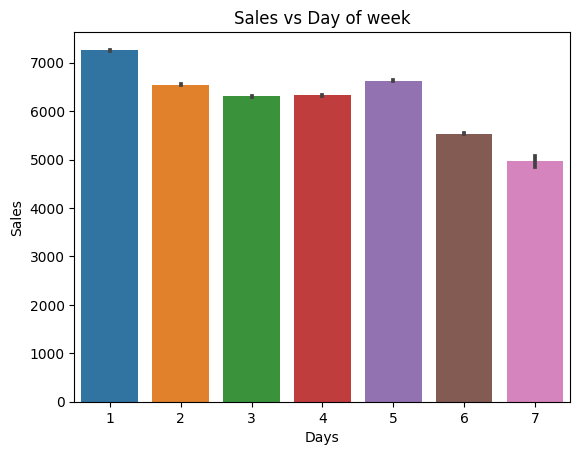

In [ ]:
#Chart 1 Sales Per Day
sns.barplot(x=df1['DayOfWeek'],y=df1['Sales'])
plt.xlabel('Days')
plt.ylabel('Sales')
plt.title('Sales vs Day of week')
plt.show()

##### 1. Why did you pick the specific chart?

I have used seaborn barplot to find out the sales over week days

##### 2. What is/are the insight(s) found from the chart?

It has been find out that Day-1 i,e Monday has got maximum Sales and Day-7 i,e Sunday has got least

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the barplot it can been seen that after day1-1 there has been decline in the sales.sufficient measures should be taken to look into this matter

#### Chart - 2 **Sales vs Promo**

In [ ]:
# Chart - 2 Sales Vs Promo
sns.barplot(x=df['Promo'],y=df['Sales'])
plt.title('Sales Vs Promo')
plt.show()

##### 1. Why did you pick the specific chart?

I have used barplot to find out the relationship between sales and promo

##### 2. What is/are the insight(s) found from the chart?

It has been find out that the sales get's almost double when a promo is running

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business should try to run more promo in order to get more sales and particularly when on those days where sales are minimum

#### Chart - 3 **Sales in Different Months**

In [ ]:
# Chart - Sales Over Months
sns.lineplot(x=df1['Month'],y=df1['Sales'],marker='o')
plt.title('Sales over different Months')
plt.show()

##### 1. Why did you pick the specific chart?

I have Picked lineplot to show sales over month trend

##### 2. What is/are the insight(s) found from the chart?

it can been seen that after october there has a very large growth in sales that might be due to festival season.December shows maximum sales may be because of christmas and new year

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the plot it can be seen that sales has been droped in the month of may so the management needs to foucus on this and they can also run any promo to increase the sales

#### Chart - 4 **Sales in different Stores Over Different Years**

<function matplotlib.pyplot.show(close=None, block=None)>

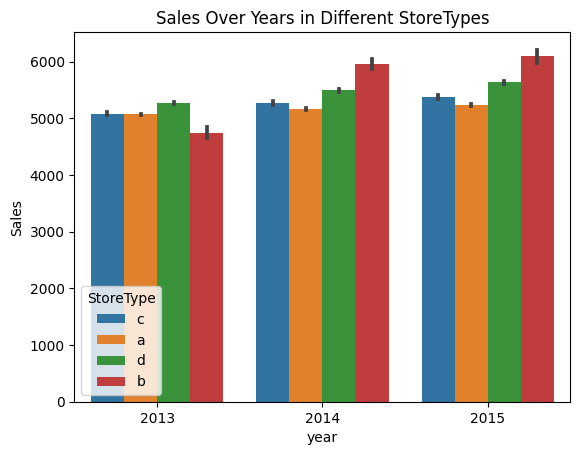

In [ ]:
# Chart - 4 Sales Over Years in Different StoreTypes
sns.barplot(x=df['year'],y=df['Sales'],hue=df['StoreType'])
plt.title('Sales Over Years in Different StoreTypes')
plt.show

##### 1. Why did you pick the specific chart?

i have picked barplot to find out Sales over year in different Store types


##### 2. What is/are the insight(s) found from the chart?

It was find out that Store b sales has been inceased from 2013 to 2015 and in 2013 store d has maximum sales and in remaining years store b has maximum sales

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The graph shows that the sales in b store type has increased over all years but sales in other store types remained almost same.So, other store should also try to use same business tatics as of store b


#### Chart - 5 **Sales vs School Holiday**

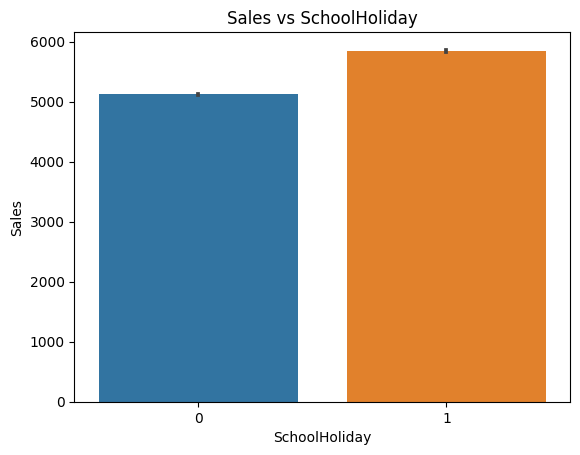

In [ ]:
# Chart - 5 Sales vs SchoolHoliday
sns.barplot(x=df['SchoolHoliday'],y=df['Sales'])
plt.title('Sales vs SchoolHoliday')
plt.show()

##### 1. Why did you pick the specific chart?

i have picked barplot to find out the effect of SchoolHoliday on Sales

##### 2. What is/are the insight(s) found from the chart?

From the graph it can be seen that there is a very good sales when schoolholiday is there, also good sales can be seen when there is no school Holiday,so SchoolHoliday doesn't really affect the sales

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since there is very small difference in sales and sales are maximum during school holidays.So the management needs to consider this also to increase sales during schoolholiday

#### Chart - 6

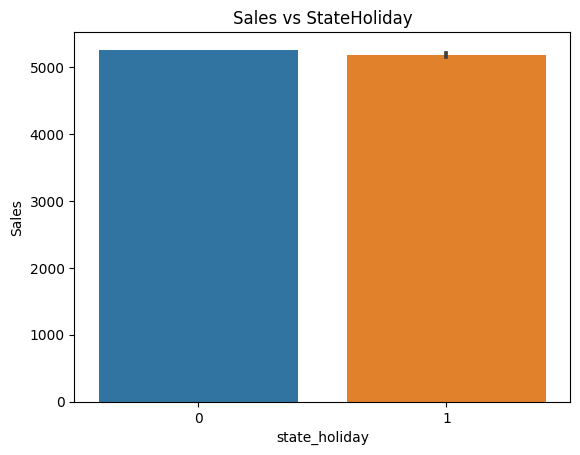

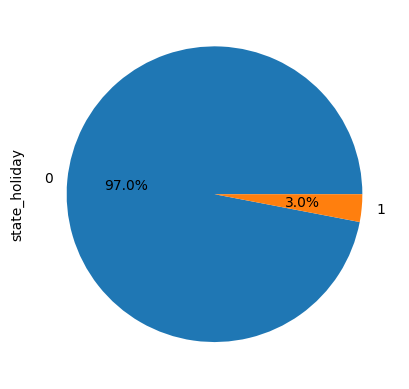

In [ ]:
# Chart - sales vs StateHoliday
#plotting barplot
sns.barplot(x=df['state_holiday'],y=df['Sales'])
plt.title('Sales vs StateHoliday')
plt.show()
#plotting pie chart
df['state_holiday'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

##### 1. Why did you pick the specific chart?

I have picked barplot and pie-chart to find out the effect of any type of state holiday on sales by how much

##### 2. What is/are the insight(s) found from the chart?

From the barplot it can be easily seen that it doesn't matter whether there is state holiday or not there is good amount of sales on both the occassions and from the pie chart it can be seen that only 3% of sales is effected by stateholiday.So overall sales doesn't depend on stateholiday

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The stateholiday doesn't effects sales

#### Chart - 7 **Sales vs Assostment Level**

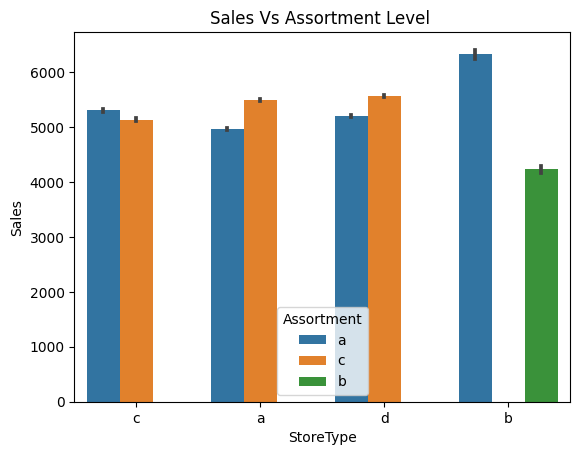

In [ ]:
# Chart - Sales vs AssortmentLevel in all stores
sns.barplot(x=df['StoreType'],y=df['Sales'],hue=df['Assortment'])
plt.title('Sales Vs Assortment Level ')
plt.show()

##### 1. Why did you pick the specific chart?

I have picked barplot to visvalize the sales in different store types with different assortment levels

##### 2. What is/are the insight(s) found from the chart?

From the plot it can that in Store B only a and b assortment has been used and out of which assortment a got maximum sales
* Also in remaining Store only a and c assortment level has been and they got equal sales

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

from the graph it can be seen there was no store were all type of assortment level were used so management should try to use all type of assortment levels

#### Chart - 8 **Sales Vs Customer**

Text(0.5, 1.0, 'Sales vs Customer')

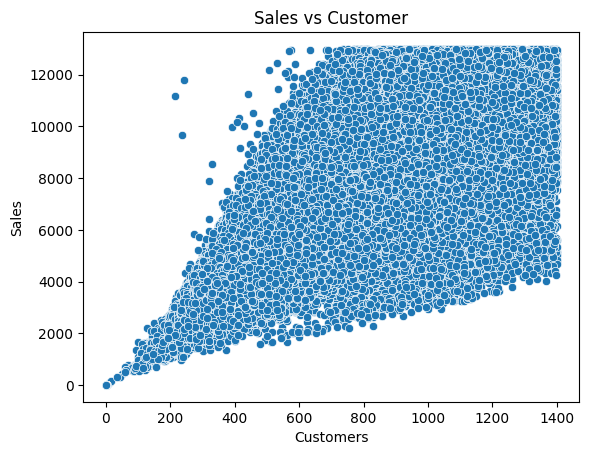

In [ ]:
# Chart - 9 Relation between Sales and Customer
sns.scatterplot(x=df['Customers'],y=df['Sales'])
plt.title('Sales vs Customer')

##### 1. Why did you pick the specific chart?

I have used scatter plot to find out the relationship between customers and sales

##### 2. What is/are the insight(s) found from the chart?

It was find out from the plot that the customers and sales are positively corelated to each other i,e more customer visits the store more will be sales

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Management should always try to always focus to attract more and more customers in order to increase Sales

#### Chart - 10

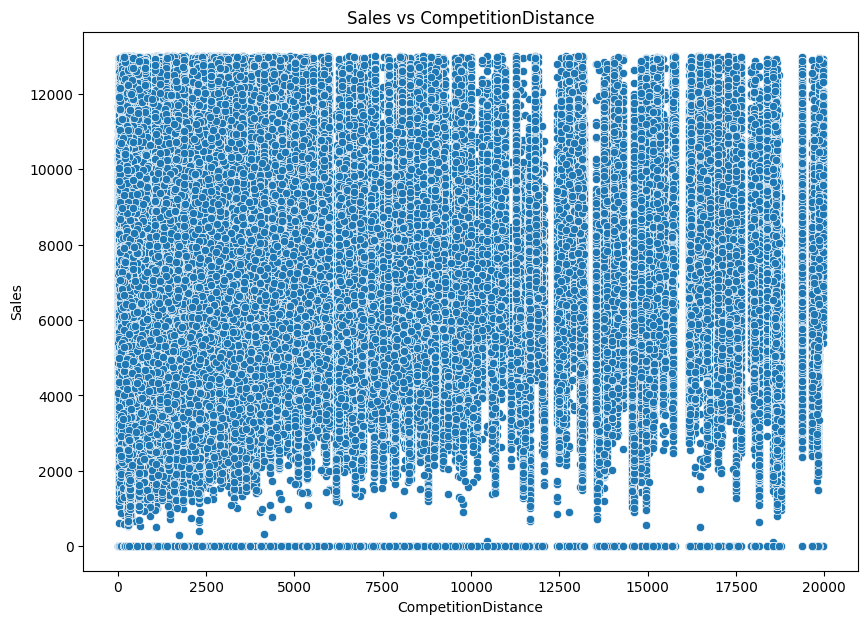

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['CompetitionDistance'],y=df['Sales'])
plt.title('Sales vs CompetitionDistance')
plt.show()

##### 1. Why did you pick the specific chart?

I have used scatter plot to find out the reationship between Sales and Competition Distance

##### 2. What is/are the insight(s) found from the chart?

It can been seen that most of the stores are very desely located to each other have more sales

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since there is very high competition so in order to keep growing the store owner need to run attracting offers to attracts more customers and increase the sales

#### Chart - 11 **Sales Vs Promo**

Text(0.5, 1.0, 'Sales vs Promo 2')

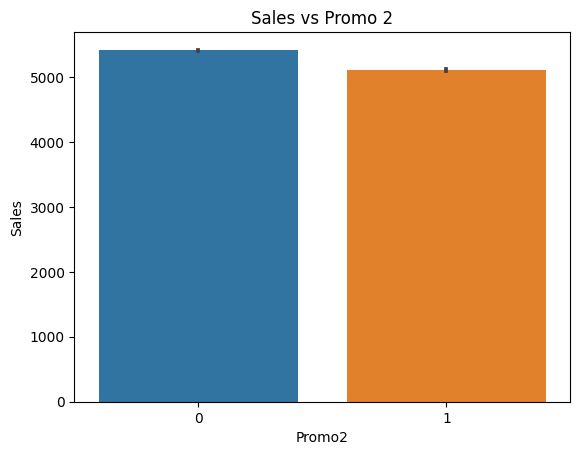

In [ ]:
# Chart - 11 visualization code
sns.barplot(x=df['Promo2'],y=df['Sales'])
plt.title('Sales vs Promo 2')

##### 1. Why did you pick the specific chart?

I have used barplot to find out effect of promo 2 on sales

##### 2. What is/are the insight(s) found from the chart?

It can be seen from the graph that Running promo continously has not been that much effective towars increasing Sales

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As running Promo Continously promo has not been that much effective towards sales so management either needs to drop this offer or to run it in more effective way

#### Chart - 14 - Correlation Heatmap

<Axes: >

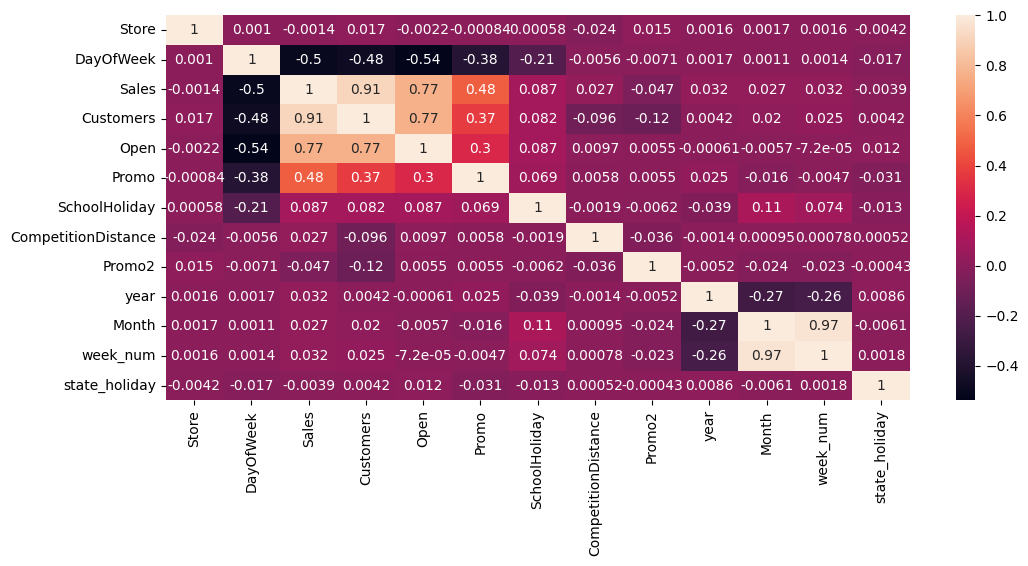

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,5))
corr=df.corr()
sns.heatmap(corr,annot=True)

##### 1. Why did you pick the specific chart?

I have Picked the heatmap to find out the correlation of all features with each other


##### 2. What is/are the insight(s) found from the chart?

* It can be find out that Promo,Open and customer has positive correlation with Sales means that if the on ruuning any promo will help in increasing the sales also more as customer visits the store there will be more sales
* Day of week is in negative correlation with sales that means on weekends Store will be closed,there will be no sales and competiton distance also some negative correlation.
* State holiday has very low negative correlation with sales as sales is not affected by state holiday same case with the school holiday
* Multicolinearity lies between promo,customers and open column


#### Chart - 15 - Pair Plot

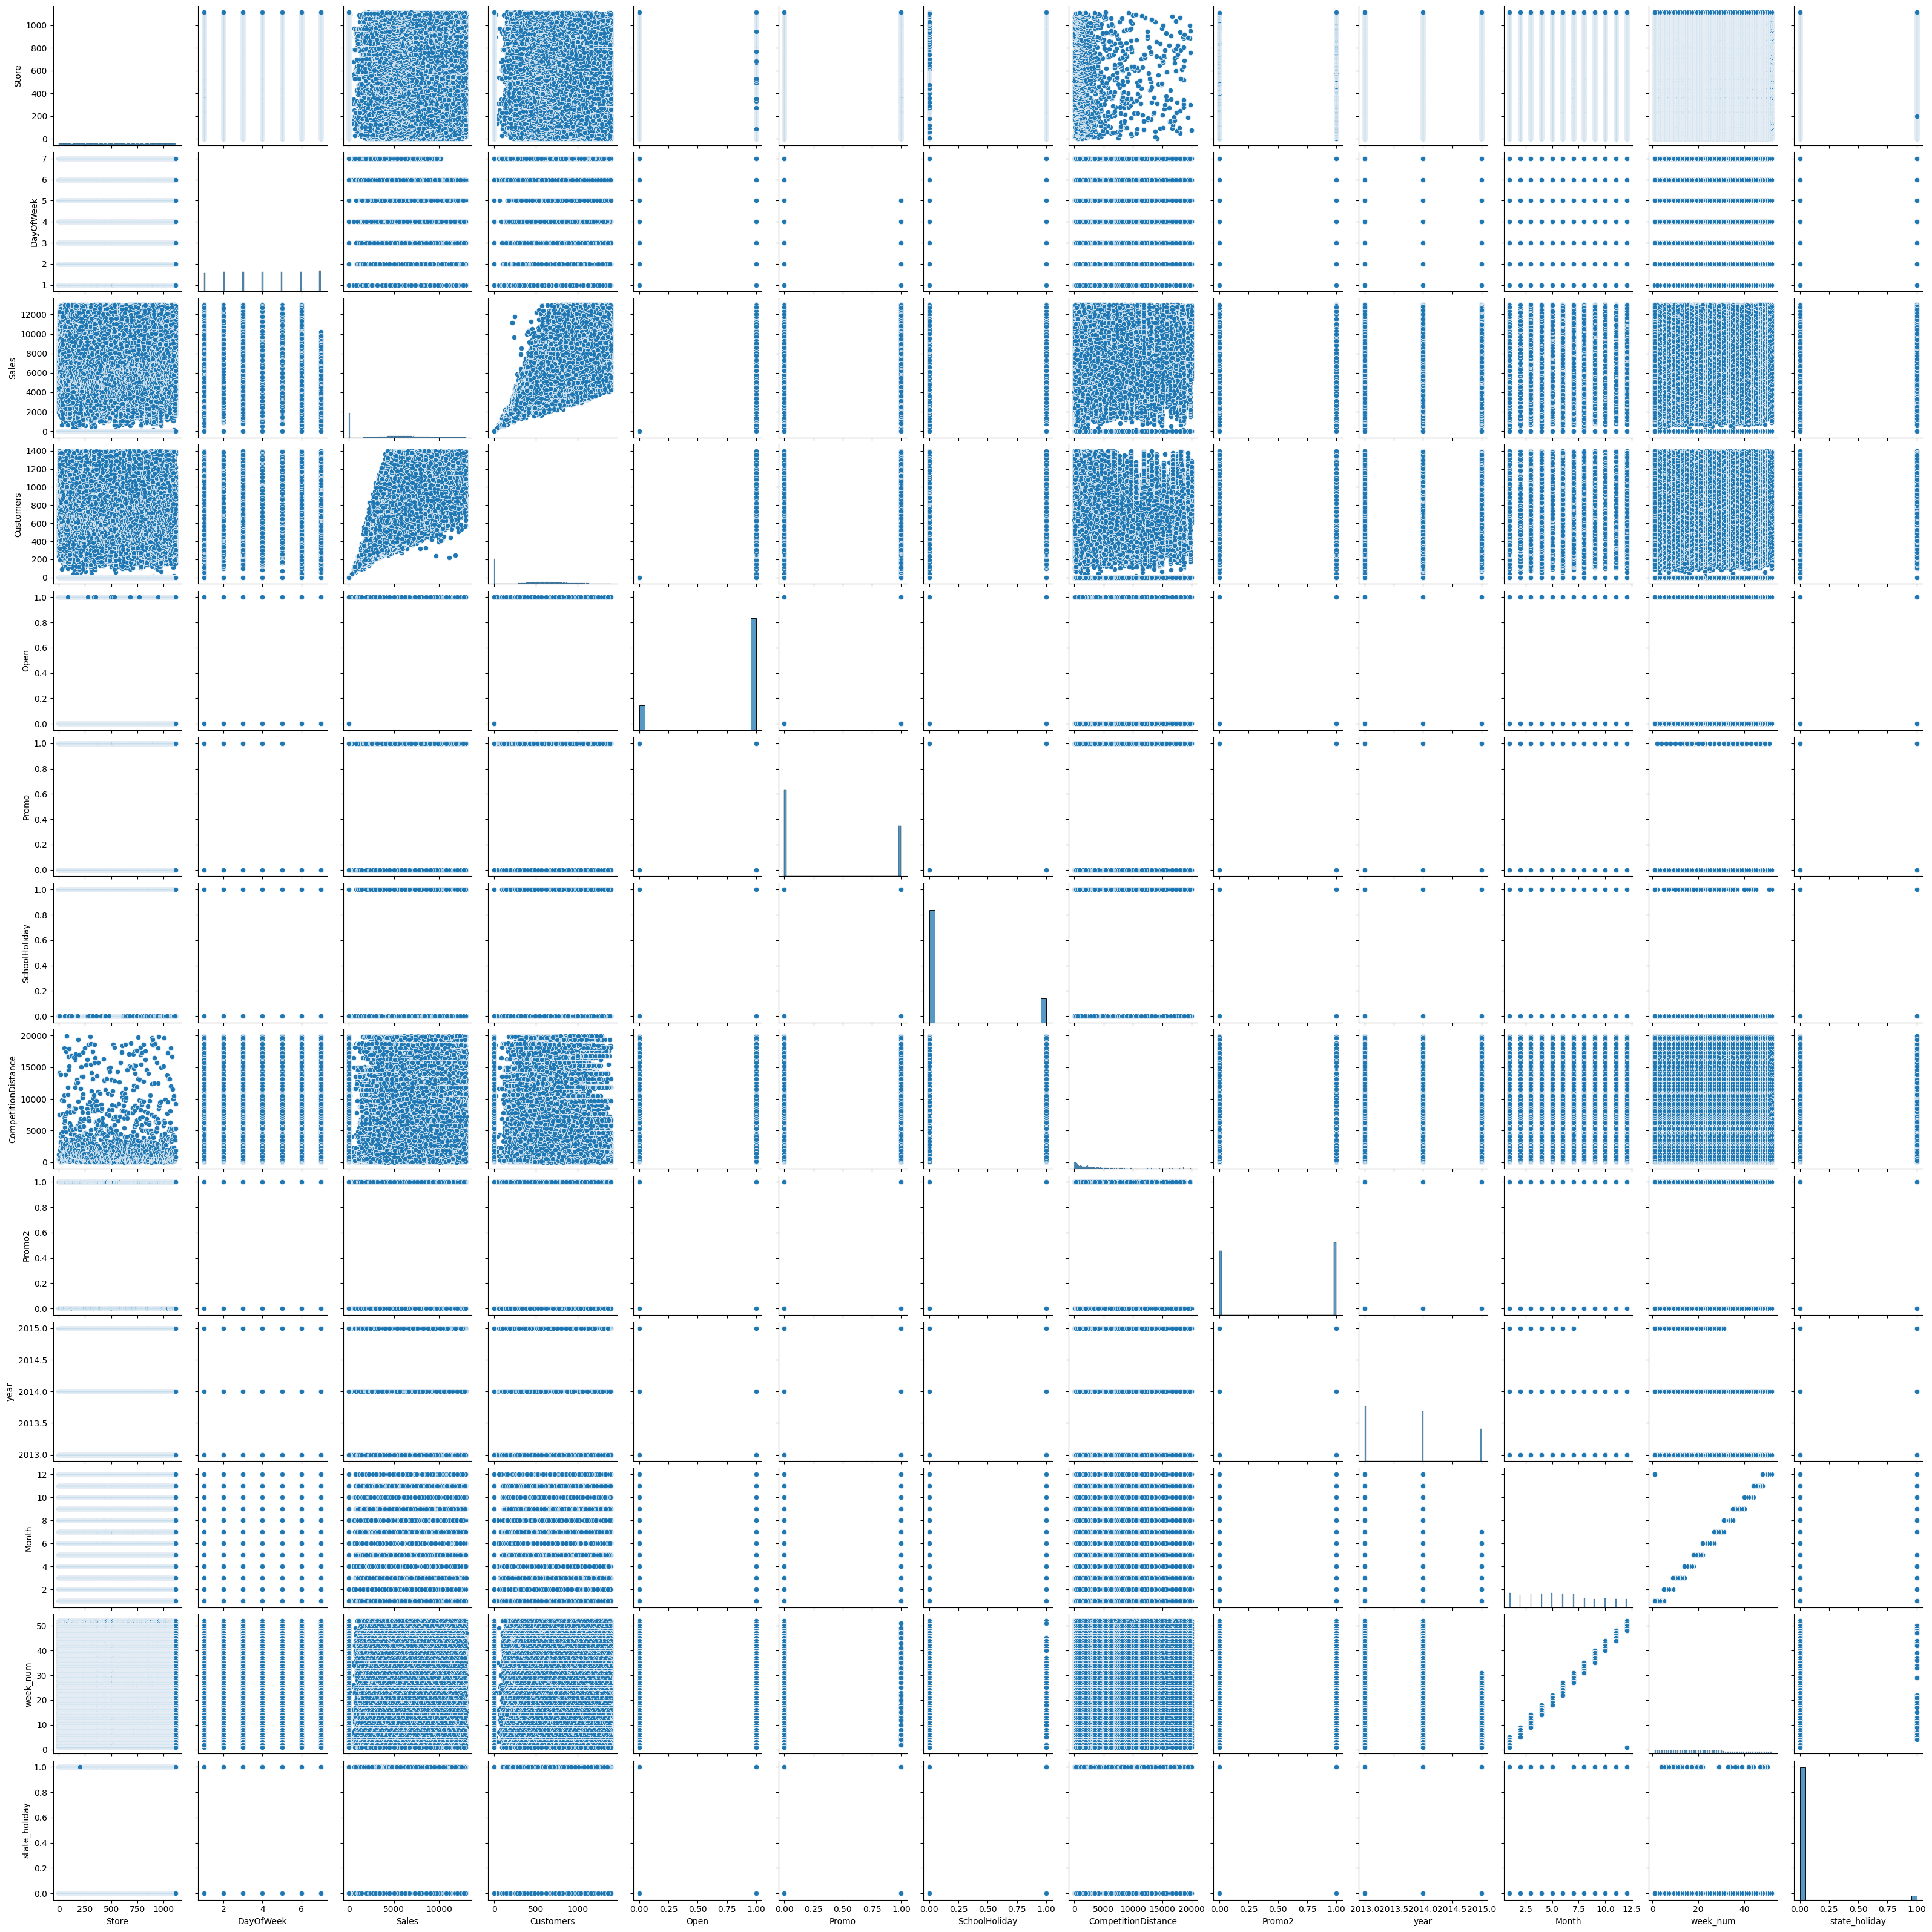

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

i have used pairplot on entire data to find out different visuals at once

##### 2. What is/are the insight(s) found from the chart?

from the graph it can be seen what all are the features that are positively corelated with sales

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* Null Hypothesis: There is no relationship between Sales and Customers
* ALternative Hypothesis: There is relationship between Sales and Customers

* Null Hypothesis: There is no relationship between Sales and Promo
* ALternative Hypothesis:There is relationship between Sales and Promo

* Null Hypothesis: There is no relationship between Sales and DayOfWeek
* ALternative Hypothesis: There is relationship between Sales and DayOfWeek

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: There is no relationship between Sales and Customers
* ALternative Hypothesis: There is relationship between Sales and Customers


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

sales = df['Sales']
customers = df['Customers']

correlation, p_value = pearsonr(sales, customers)

print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Sales and Customers.")
else:
    print("Accept the null hypothesis. There is no significant relationship between Sales and Customers.")


Pearson correlation coefficient: 0.9124953576449817
p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Sales and Customers.


##### Which statistical test have you done to obtain P-Value?


In order to find out the relationship between two variables (Sales and Customers), i have used the Pearson correlation coefficient to test the hypothesis. The Pearson correlation coefficient measures the strength and direction of the linear relationship between two variables.

##### Why did you choose the specific statistical test?

I want to find out the correlation coefficient and P vlaue between the two features that's why i have used Pearson.It gives Corelation coeficient value between -1 and 1. A positive correlation coefficient close to 1 indicates a strong positive relationship, whereas a negative correlation coefficient close to -1 indicates a strong negative relationship. A correlation coefficient close to 0 indicates no linear relationship.
Also the p-value will indicate the statistical significance of the correlation. A p-value less than the significance level (commonly 0.05) suggests that the correlation is statistically significant, providing evidence to reject the null hypothesis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no relationship between Sales and Promo

ALternative Hypothesis:There is relationship between Sales and Promo

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Valuefrom scipy.stats import pearsonr

sales = df['Sales']
promo = df['Promo']

correlation, p_value = pearsonr(sales, promo)

print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Sales and Promo.")
else:
    print("Accept the null hypothesis. There is no significant relationship between Sales and Promo.")


Pearson correlation coefficient: 0.4809472646793369
p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Sales and Promo.


##### Which statistical test have you done to obtain P-Value?

In order to find out the relationship between two variables (Sales and Promo), i have used the Pearson correlation coefficient to test the hypothesis. The Pearson correlation coefficient measures the strength and direction of the linear relationship between two variables.

##### Why did you choose the specific statistical test?

I want to find out the correlation coefficient and P vlaue between the two features that's why i have used Pearson.It gives Corelation coeficient value between -1 and 1. A positive correlation coefficient close to 1 indicates a strong positive relationship, whereas a negative correlation coefficient close to -1 indicates a strong negative relationship. A correlation coefficient close to 0 indicates no linear relationship. Also the p-value will indicate the statistical significance of the correlation. A p-value less than the significance level (commonly 0.05) suggests that the correlation is statistically significant, providing evidence to reject the null hypothesis.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no relationship between Sales and DayOfWeek

ALternative Hypothesis: There is relationship between Sales and DayOfWeek

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

sales = df['Sales']
Schoolholiday= df['SchoolHoliday']

correlation, p_value = pearsonr(sales, Schoolholiday)

print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Sales and SchoolHoliday .")
else:
    print("Accept the null hypothesis. There is no significant relationship between Sales and SchoolHoliday.")

Pearson correlation coefficient: 0.0871285783009051
p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Sales and SchoolHoliday .


##### Which statistical test have you done to obtain P-Value?

In order to find out the relationship between two variables (Sales and Promo), i have used the Pearson correlation coefficient to test the hypothesis. The Pearson correlation coefficient measures the strength and direction of the linear relationship between two variables.

##### Why did you choose the specific statistical test?

I want to find out the correlation coefficient and P vlaue between the two features that's why i have used Pearson.It gives Corelation coeficient value between -1 and 1. A positive correlation coefficient close to 1 indicates a strong positive relationship, whereas a negative correlation coefficient close to -1 indicates a strong negative relationship. A correlation coefficient close to 0 indicates no linear relationship. Also the p-value will indicate the statistical significance of the correlation. A p-value less than the significance level (commonly 0.05) suggests that the correlation is statistically significant, providing evidence to reject the null hypothesis.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908510 entries, 0 to 908509
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                908510 non-null  int64  
 1   DayOfWeek            908510 non-null  int64  
 2   Sales                908510 non-null  int64  
 3   Customers            908510 non-null  int64  
 4   Open                 908510 non-null  int64  
 5   Promo                908510 non-null  int64  
 6   SchoolHoliday        908510 non-null  int64  
 7   StoreType            908510 non-null  object 
 8   Assortment           908510 non-null  object 
 9   CompetitionDistance  908510 non-null  float64
 10  Promo2               908510 non-null  int64  
 11  year                 908510 non-null  int64  
 12  Month                908510 non-null  int64  
 13  week_num             908510 non-null  int64  
 14  state_holiday        908510 non-null  int64  
dtypes: float64(1), in

In [ ]:
#let's change the datatype of CompetitionDistance to int
df['CompetitionDistance']=df['CompetitionDistance'].astype('int')

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Store                  0
DayOfWeek              0
Sales                  0
Customers              0
Open                   0
Promo                  0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
year                   0
Month                  0
week_num               0
state_holiday          0
dtype: int64

The data frame is already cleaned.All the missing values has already filled
during EDA Process

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

Outliers can lead to biased insights and conclusions when analyzing data.So we should treat the outliers before passing the data into our model.In our dataset only in Sales,Customers and CompetitionDistnace outliers were present and i have already removed them during EDA process by consideing values around 95 percentile and removed all other values above it

### 3. Categorical Encoding

StoreType,Assortment Column Contains Categorical Values So, i have to Encode them

In [ ]:
#Encode the cetagorical columns
#Encode StoreType,Assortment column using One Hot Encoding
encoded_df = pd.get_dummies(df, columns=['StoreType','Assortment'],dtype=int,drop_first=True)

In [ ]:
encoded_df.head()

Store  DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday  \
0      1          5   5263        555     1      1              1   
1      2          5   6064        625     1      1              1   
2      3          5   8314        821     1      1              1   
3      6          5   5651        589     1      1              1   
4      8          5   8492        833     1      1              1   

   CompetitionDistance  Promo2  year  Month  week_num  state_holiday  \
0                 1270       0  2015      7        31              0   
1                  570       1  2015      7        31              0   
2                14130       1  2015      7        31              0   
3                  310       0  2015      7        31              0   
4                 7520       0  2015      7        31              0   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  
0            0            1            0             0             0  
1            0            0            0             0             0  
2            0            0            0             0             0  
3            0            0            0             0             0  
4            0            0            0             0             0

#### What all categorical encoding techniques have you used & why did you use those techniques?

In Our dataframe StoreType,Assortment are Cetagorical Features,so inorder to encode these features i have used get_dummies Function from pandas for One Hot Encoding as it is straight forward and easy to use function provided by pandas to perform one hot encoding in just one line of code and also it retains the original column names and allows for easy interpretation and exploration of the encoded categorical variables

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

<Axes: >

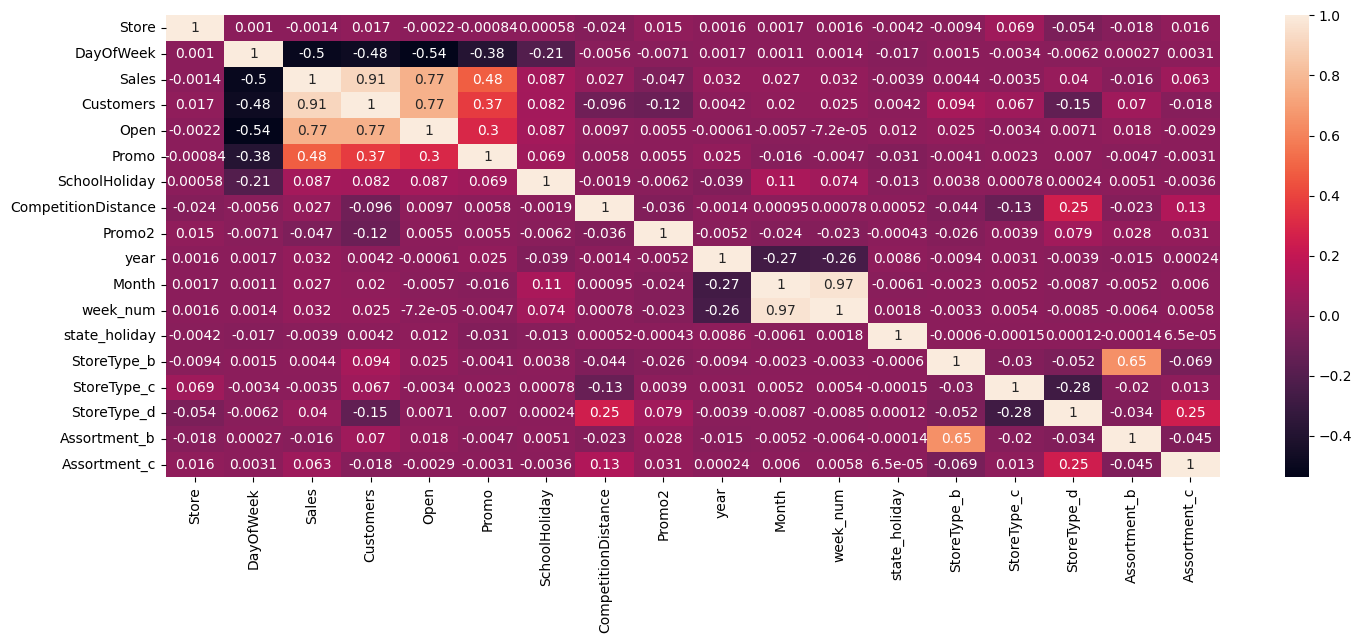

In [ ]:
plt.figure(figsize=(17,6))
sns.heatmap(encoded_df.corr(),annot=True)

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
#let's calculate the VIF to find Multicolinearity between the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=encoded_df[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'year', 'Month',
       'week_num', 'state_holiday', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c']]
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

               Variable  VIF
0                 Store    4
1             DayOfWeek    8
2             Customers   11
3                  Open   16
4                 Promo    2
5         SchoolHoliday    1
6   CompetitionDistance    2
7                Promo2    2
8                  year   32
9                 Month   65
10             week_num   58
11        state_holiday    1
12          StoreType_b    2
13          StoreType_c    1
14          StoreType_d    2
15         Assortment_b    2
16         Assortment_c    2


Here Many of the features have very high Multicolinearity so we have to exclude some feature
* Month have very high corelation with week number i,e 0.97 and their respective corelation with sales is 0.027 and 0.032,so we will keep Week_no feature
* year feature is has also high VIF So we remove this also
* Customer and open also have high VIF value and also correlation with each other is 0.77 and with sales is 0.91 and 0.77 respectively

In [ ]:
# After Analysing all feature and Removing those features having high corelation
#calculating VIF again
X=encoded_df[['Store', 'DayOfWeek', 'Customers', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Month',
        'state_holiday', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c']]
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

               Variable  VIF
0                 Store    4
1             DayOfWeek    4
2             Customers    4
3                 Promo    2
4         SchoolHoliday    1
5   CompetitionDistance    2
6                Promo2    2
7                 Month    4
8         state_holiday    1
9           StoreType_b    2
10          StoreType_c    1
11          StoreType_d    2
12         Assortment_b    2
13         Assortment_c    2


Here VIF is now less than 5 for all features

#### 2. Feature Selection

In [ ]:
# Selecting only those features which are important
new_df=encoded_df[[ 'DayOfWeek', 'Customers', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Month',
        'state_holiday', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c','Sales']]


In [ ]:
new_df.head()

DayOfWeek  Customers  Promo  SchoolHoliday  CompetitionDistance  Promo2  \
0          5        555      1              1                 1270       0   
1          5        625      1              1                  570       1   
2          5        821      1              1                14130       1   
3          5        589      1              1                  310       0   
4          5        833      1              1                 7520       0   

   Month  state_holiday  StoreType_b  StoreType_c  StoreType_d  Assortment_b  \
0      7              0            0            1            0             0   
1      7              0            0            0            0             0   
2      7              0            0            0            0             0   
3      7              0            0            0            0             0   
4      7              0            0            0            0             0   

   Assortment_c  Sales  
0             0   5263  
1             0   6064  
2             0   8314  
3             0   5651  
4             0   8492

##### What all feature selection methods have you used  and why?

* I used heatmap to find out the corelation of all the features with each other and with sales also and it was find out that some of the features have very positive,negative and very minimum corelation with sales.Customers,open and sales have very high corelation with sales and dayofweek has low
* After that i calculated VIF value of all the features with each other and excluded those features which were having Multicolinearity

##### Which all features you found important and why?

features like  'DayOfWeek', 'Customers', 'Promo','SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Month','is_state_holiday', 'StoreType_b', 'StoreType_c','StoreType_d', 'Assortment_b', 'Assortment_c','Sales' are important feature.These are having VIF under 5 and corelation with sales and also each feature is important for predicting Sales

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
#due to reinbursment the shops were closed and on those days sales were zero
new_df1=new_df[new_df['Sales']!=0]

In [ ]:
# Let's find out skewness of continous feature
new_df1[['Customers','CompetitionDistance','Sales']].skew()

Customers             1
CompetitionDistance   2
Sales                 0
dtype: float64

In customers,competitionsDistance there is positive skewness present,Now let's transform the data

<Axes: xlabel='Customers', ylabel='Density'>

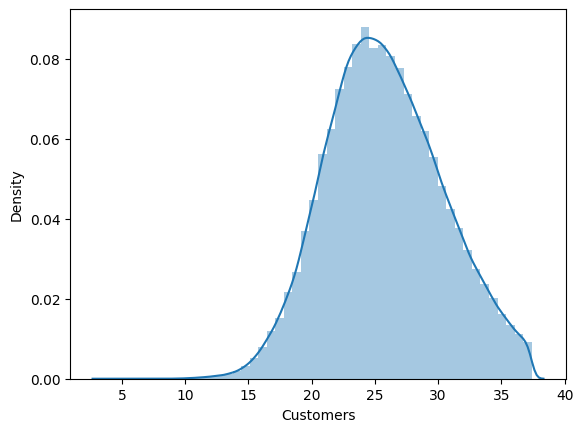

In [ ]:
sns.distplot(np.sqrt(new_df1['Customers']))

In [ ]:
sns.distplot(np.sqrt(new_df['CompetitionDistance']))

<Axes: xlabel='CompetitionDistance', ylabel='Density'>

In [ ]:
#TransFrom the data using SQRT transformation
new_df['CompetitionDistance']=np.sqrt(new_df['CompetitionDistance'])
new_df['Customers']=np.sqrt(new_df['Customers'])


### 6. Data Scaling

In [ ]:
#before Scaling let's find out dependent and independent features
X=new_df.drop(columns=['Sales']) #idependent Variable/feature
y=new_df[['Sales']]                #Dependent Variable

In [ ]:
print(X.shape)
print(y.shape)

(908510, 13)
(908510, 1)


In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#fit and transform
X=sc.fit_transform(X)

##### Which method have you used to scale you data and why?

I have used StandardScaler from the scikit-learn library for scaling data. This method transforms the data such that it has a mean of 0 and a standard deviation of 1.It helps to bring all features onto a similar scale.When features have significantly different scales, it can lead to biased model training or result in features with larger scales dominating the learning process.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No Need

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((726808, 13), (181702, 13), (726808, 1), (181702, 1))

##### What data splitting ratio have you used and why?

As dataset is huge i have choosen 80-20 ratio. By allocating 80% of the data to the training set, we will get enough data to train the model and capture patterns and relationships in the data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No need


In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

# **NOTE**: I have two type of data right now first is **new_df** which contains all the data and second one is **new_df1** in which i have not considered those rows where sales is zero.The second dataset contains less data and there might be some other valuable information also which might get lost.So i will be using complete dataset for my models

In [ ]:
#filtered out dataset
new_df1.shape

(743821, 14)

In [ ]:
#complete dataset
new_df.shape

(908510, 14)

### ML Model - 1

# **Linear Regression**

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
# Fit the Algorithm
lr.fit(x_train,y_train)
# Predict on the model
y_train_predict=lr.predict(x_train)
y_test_predict=lr.predict(x_test)

In [ ]:
#coefficients
lr.coef_

array([[ 109.49287073, 2802.19574391,  559.49606626,    4.41416847,
         162.29408723,   27.34738178,   68.23949343,  -15.3925067 ,
         -52.08910192,  -35.34508547,  261.43632731, -131.85343072,
         129.3171448 ]])

In [ ]:
#intercept
lr.intercept_

array([5249.29684615])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#importing labraries to check the accuracy of the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [ ]:
#let's define a function of metrics
def cal_metrics_score(y_train,y_train_pred,y_test,y_test_pred):
  #mean_squared_error metrics
  MSE_train=mean_squared_error(y_train,y_train_pred)
  print('MSE train score is :',MSE_train)
  MSE_test=mean_squared_error(y_test,y_test_pred)
  print('MSE test score is :',MSE_test)

  #Root mean square error
  print('RMSE train Score: ',np.sqrt(MSE_train))
  print('RMSE test Score: ',np.sqrt(MSE_test))

  #R2 score
  r2_train=r2_score(y_train,y_train_pred)
  print('r2 train score: ',r2_train)
  r2_test=r2_score(y_test,y_test_pred)
  print('r2 test score: ',r2_test)

In [ ]:
# calculating metrics
cal_metrics_score(y_train,y_train_predict,y_test,y_test_predict)

MSE train score is : 1346484.2612619065
MSE test score is : 1349552.4607913191
RMSE train Score:  1160.3810844984964
RMSE test Score:  1161.7023976868254
r2 train score:  0.8685066045565502
r2 test score:  0.868670937166989


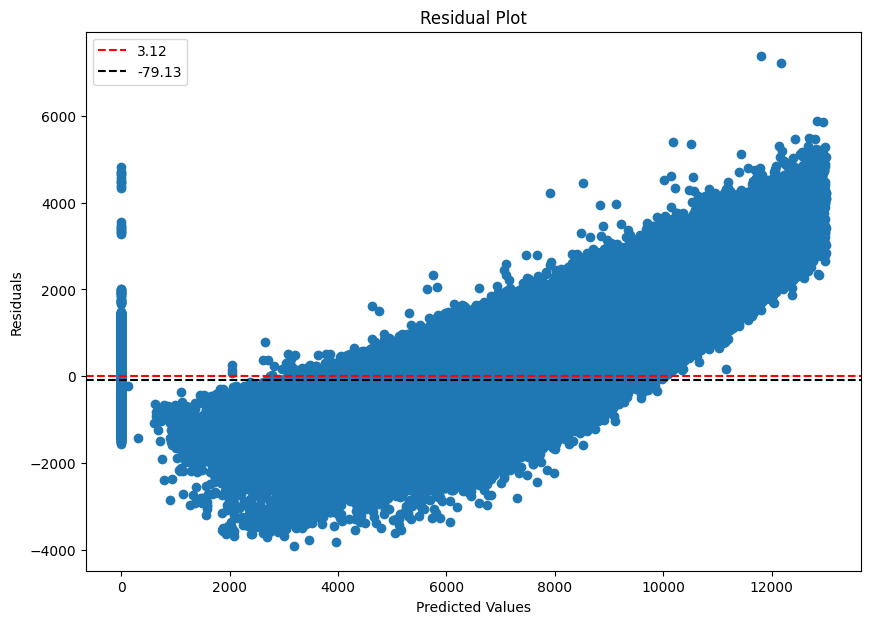

In [ ]:
#plot residuals
residuals=y_test-y_test_predict
plt.figure(figsize=(10,7))
plt.scatter(y_test,residuals)
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--',label=round(np.mean(residuals),2)[0])
plt.axhline(y=np.nanmedian(residuals), color='black', linestyle='--',label=round(np.median(residuals),2))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

 linear regression model achieved a reasonably good R-squared score of 86%, indicating that it explains a significant portion of the variance in the target variable.The residual plot, which is a graphical representation of the differences between the actual values (y_test) and the predicted values .(y_test_predict).It helps us to visvalize the distribution of residuals.Ideally the residuals should be scatteres around mean or zero line that indicates the model presiction is unbiased.from the plot it can be seen that the model tends to have a positive bias or slight underestimation (mean residual of 3.12) and a larger negative bias or significant overestimation (median residual of -79.12).
 * since the r2 score is not that much good and mean and median values of the residuals are not close to zero let's go for cross validation and hyperparameter tunning

#### 2. Cross- Validation & Hyperparameter Tuning

## Ridge Regression

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid,scoring='r2',cv=5)
grid_search.fit(x_train,y_train)

# Predict on the model
y_train_pred = grid_search.predict(x_train)
y_test_pred = grid_search.predict(x_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

best param: {'alpha': 1}
best score: 0.86849974190702


In [ ]:
# calculating metrics for Ridge
cal_metrics_score(y_train,y_train_pred,y_test,y_test_pred)

MSE train score is : 1346484.2612850252
MSE test score is : 1349552.4998818235
RMSE train Score:  1160.3810845084581
RMSE test Score:  1161.702414511489
r2 train score:  0.8685066045542924
r2 test score:  0.8686709333629727


# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
lasso = Lasso()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(lasso, param_grid,scoring='r2',cv=5)
grid_search.fit(x_train,y_train)

# Predict on the model
y_train_lasso_pred = grid_search.predict(x_train)
y_test_lasso_pred = grid_search.predict(x_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

best param: {'alpha': 0.1}
best score: 0.8684997342531956


In [ ]:
#calculating metrics for Lasso Regressions
cal_metrics_score(y_train,y_train_lasso_pred,y_test,y_test_lasso_pred)

MSE train score is : 1346484.405037203
MSE test score is : 1349556.4809815218
RMSE train Score:  1160.3811464502528
RMSE test Score:  1161.7041279867785
r2 train score:  0.8685065905159093
r2 test score:  0.8686705459500285


Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
enet= ElasticNet()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(enet, param_grid,scoring='r2',cv=5)
grid_search.fit(x_train,y_train)

# Predict on the model
y_train_enet_pred = grid_search.predict(x_train)
y_test_enet_pred = grid_search.predict(x_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

best param: {'alpha': 0.1}
best score: 0.8660145915413777


In [ ]:
#calculating metrics for ElasticNet Regression
cal_metrics_score(y_train,y_train_enet_pred,y_test,y_test_enet_pred)

MSE train score is : 1371938.2389255348
MSE test score is : 1376228.3995598936
RMSE train Score:  1171.297673064168
RMSE test Score:  1173.1276143539942
r2 train score:  0.8660208495820394
r2 test score:  0.8660750202682761


##### Which hyperparameter optimization technique have you used and why?




i have used GridSearchCV technique for hyperparameter tuning . It systematically searches through a predefined set of hyperparameters and evaluates the model's performance for each combination using cross-validation

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I tried multiple regularization techniques, including Lasso, Ridge, and Elastic Net, with Gridsearch cv as a hyperparameter. However, i observed that the R-squared score remains the same despite these attempts.Now let's try some complex Models

### ML Model - 2

# **Decision Tree**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model - 2 Implementation
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=20)
# Fit the Algorithm
dt.fit(x_train,y_train)
# Predict on the model
y_train_dt_pred=dt.predict(x_train)
y_test_dt_pred=dt.predict(x_test)


In [ ]:
# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_dt_pred,y_test,y_test_dt_pred)

MSE train score is : 134246.13254311684
MSE test score is : 316611.27081040735
RMSE train Score:  366.3961415505311
RMSE test Score:  562.6822112084292
r2 train score:  0.9868899471749472
r2 test score:  0.9691895923382492


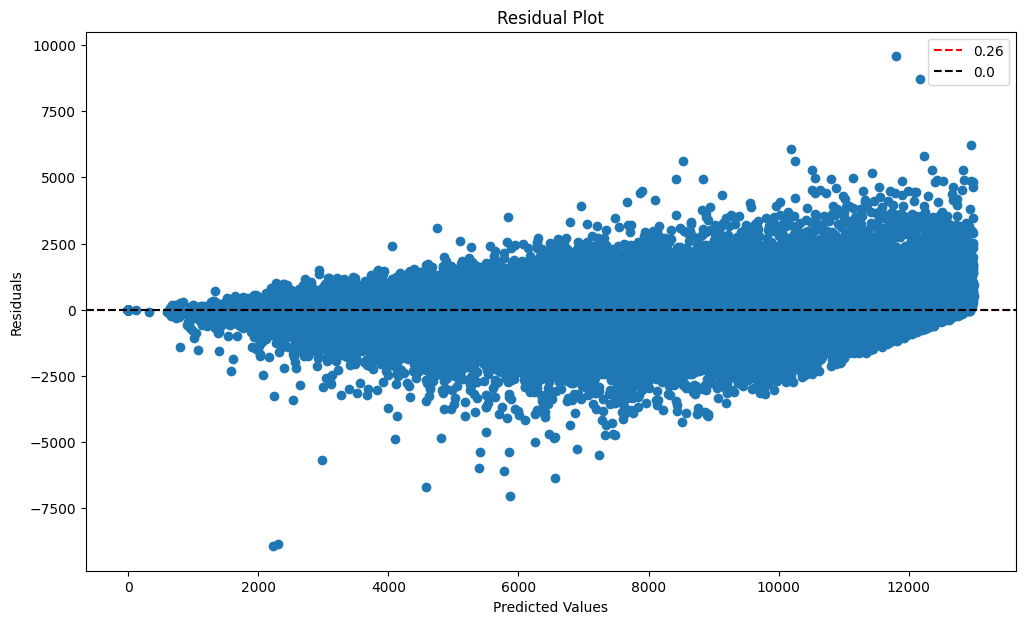

In [ ]:
#plot residuals
y_test_dtt_pred= y_test_dt_pred.reshape(-1,1)
residuals=y_test-y_test_dtt_pred
plt.figure(figsize=(12,7))
plt.scatter(y_test,residuals)
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--',label=round(np.mean(residuals),2)[0])
plt.axhline(y=np.nanmedian(residuals), color='black', linestyle='--',label=round(np.median(residuals),2))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

The decision tree model has achieved high performance on both the training and test data.

R2 Score: The model achieved a high R2 score of 98.86% on the training data and 96.9% on the test data.

Mean and Median Residuals: The mean residual value is 0.26, indicating a slight positive bias in the model's predictions. The median residual value is zero, suggesting that the majority of the residuals are centered around zero.

MSE and RMSE Scores: The model achieved a relatively low MSE train score of
 134,246.13 and an RMSE train score of 366.40, indicating that the model's predictions have a small average squared difference and deviation from the actual values in the training data. The MSE test score is higher at 316,611.27, indicating larger deviations in the test data, but the RMSE test score of 562.68 is still reasonable.

Overall, the decision tree model demonstrates strong predictive performance, with high R2 scores, accurate predictions indicated by mean and median residuals, and relatively low MSE and RMSE scores.






#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
dt=DecisionTreeRegressor()
param_grid={'max_depth': [17,18,19,20], 'min_samples_leaf': [5,6,7,8], 'min_samples_split': [1,3,4,5]}
gridsearch=GridSearchCV(dt,param_grid,scoring='r2', cv=3)
gridsearch.fit(x_train,y_train)
# Predict on the model
y_train_dtgs_pred=gridsearch.predict(x_train)
y_test_dtgs_pred=gridsearch.predict(x_test)
# Retrieve the best hyperparameters and best score
best_params = print('best param:',gridsearch.best_params_)
best_score = print('best score:',gridsearch.best_score_)

best param: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 3}
best score: 0.968747723916649


In [ ]:
# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_dtgs_pred,y_test,y_test_dtgs_pred)

MSE train score is : 183232.75496178624
MSE test score is : 288947.58889876376
RMSE train Score:  428.05695294176246
RMSE test Score:  537.5384534140453
r2 train score:  0.9821060685226262
r2 test score:  0.9718816295324435


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV technique for hyperparameter tuning . It systematically searches through a predefined set of hyperparameters and evaluates the model's performance for each combination using cross-validation and gives out best possible combination of the parameters

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After performing hyperparameter tuning using grid search CV and cross-validation, the decision tree model was further optimized.

Best Parameters: The best combination of hyperparameters found through grid search CV was max_depth of  20 and min_samples_leaf of 5 and min_samples_split of 3. This indicates that a maximum depth of 20 and minimum samples per leaf of 5 were determined to be optimal for the model.

MSE and RMSE Scores: The updated MSE train score is 183,232.75, indicating the average squared difference between the predicted and actual values in the training data. The RMSE train score is 428.06, which is the square root of the MSE train score. These scores represent the model's performance on the training data.

The MSE test score is 288,947.59, representing the average squared difference between the predicted and actual values in the test data. The RMSE test score is 537.54, which is the square root of the MSE test score. These scores indicate the model's performance on unseen data.

R2 Scores: The updated R2 train score is 0.9821, indicating that the model explains approximately 98.21% of the variability in the target variable based on the training data. The R2 test score is 0.9719, suggesting that the model performs well in explaining the variance in the target variable for unseen data.

The model's performance has improved after hyperparameter tuning, with reduced MSE and RMSE scores on both the training and test data. The R2 scores also demonstrate high explanatory power and good generalization capability.


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

 A high R-squared score indicates that the model is able to capture a large portion of the target variable's variability, suggesting a strong relationship between the features and the target

### ML Model - Random Forest

In [ ]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,max_depth=20)

# Fit the Algorithm
rf.fit(x_train,y_train)

# Predict on the model
y_train_rf_pred=rf.predict(x_train)
y_test_rf_pred=rf.predict(x_test)

In [ ]:
# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_rf_pred,y_test,y_test_rf_pred)

MSE train score is : 100078.0063693201
MSE test score is : 209119.6380904674
RMSE train Score:  316.35108087269134
RMSE test Score:  457.2960070790772
r2 train score:  0.9902266983392883
r2 test score:  0.9796499307079206


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

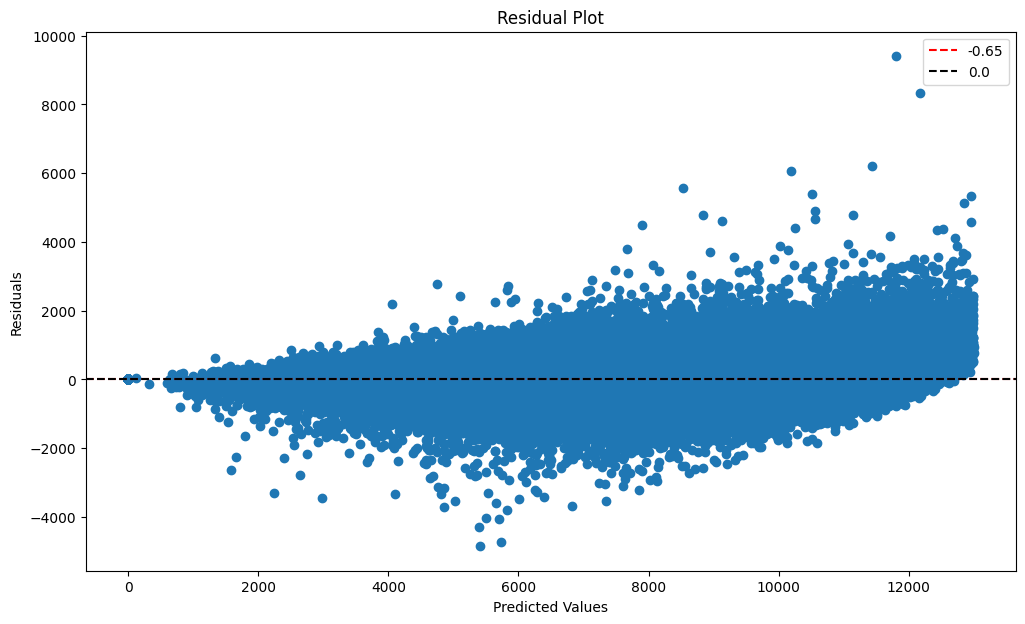

In [ ]:
#plot residuals
y_test_rff_pred= y_test_rf_pred.reshape(-1,1)
residuals=y_test-y_test_rff_pred
plt.figure(figsize=(12,7))
plt.scatter(y_test,residuals)
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--',label=round(np.mean(residuals),2)[0])
plt.axhline(y=np.nanmedian(residuals), color='black', linestyle='--',label=round(np.median(residuals),2))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()


After applying the Random Forest model with 100 estimators and a maximum depth of 20, the model's performance and residual analysis are as follows:

MSE and RMSE Scores: The MSE train score is 100,078.01, indicating the average squared difference between the predicted and actual values in the training data. The RMSE train score is 316.35, which is the square root of the MSE train score. These scores represent the model's performance on the training data.

The MSE test score is 209,119.64, representing the average squared difference between the predicted and actual values in the test data. The RMSE test score is 457.30, which is the square root of the MSE test score. These scores indicate the model's performance on unseen data.

R2 Scores: The R2 train score is 0.9902, indicating that the model explains approximately 99.02% of the variability in the target variable based on the training data. The R2 test score is 0.9796, suggesting that the model performs well in explaining the variance in the target variable for unseen data.

Residual Analysis: The scatter plot of residuals reveals that the mean residual value is -0.65, indicating a slight negative bias in the model's predictions. The median residual value is 0, suggesting that the majority of the residuals are centered around zero, indicating overall accurate predictions.

In summary, the Random Forest model with 100 estimators and a maximum depth of 20 demonstrates high performance, with low MSE and RMSE scores and high R2 scores on both the training and test data. The model's predictions are generally accurate, as indicated by the median residual value of 0. However, there is a slight negative bias in the mean residual value.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
# Fit the Algorithm
rf=RandomForestRegressor()
param_grid={'n_estimators':[100],'max_depth':[18,19,20]}
rf_randomsearch=RandomizedSearchCV(rf,param_grid,scoring='neg_mean_squared_error',n_iter=3,n_jobs=-1,cv=3,verbose=2)
rf_randomsearch.fit(x_train,y_train)
# Predict on the model
y_train_rffgs_pred=rf_randomsearch.predict(x_train)
y_test_rfgs_pred=rf_randomsearch.predict(x_test)
# Retrieve the best hyperparameters and best score
best_params = print('best param:',rf_randomsearch.best_params_)
best_score = print('best score:',rf_randomsearch.best_score_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
best param: {'n_estimators': 100, 'max_depth': 20}
best score: -227107.92999202068


In [ ]:
# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_rffgs_pred,y_test,y_test_rfgs_pred)

MSE train score is : 100641.97594100253
MSE test score is : 209544.13314350185
RMSE train Score:  317.24119521430777
RMSE test Score:  457.759907750233
r2 train score:  0.9901716228541595
r2 test score:  0.9796086218006259


##### Which hyperparameter optimization technique have you used and why?

I have used Random Search cv hyperparameter to tune my model.It is more efficient than GridSearchCV when searching through a large hyperparameter space because it does not evaluate all possible combinations.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After applying Random Search cv as a hyperparamter tunning it was found that the best parametes are n_estimator=100 and max_depth=20.The model gave out almost same MSE,RMSE and R2 score

# **Model 4 : XGBOOST**

In [ ]:
#import the algorithm
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100,learning_rate=0.1, max_depth=13)
#fit the algorithm
xgb.fit(x_train,y_train)
# Predict on the mode
y_train_xgb_pred=xgb.predict(x_train)
y_test_xgb_pred=xgb.predict(x_test)

In [ ]:
# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_xgb_pred,y_test,y_test_xgb_pred)

MSE train score is : 141368.51842395615
MSE test score is : 185145.4863358007
RMSE train Score:  375.9900509640596
RMSE test Score:  430.2853545448656
r2 train score:  0.9861943974904285
r2 test score:  0.9819829284783894


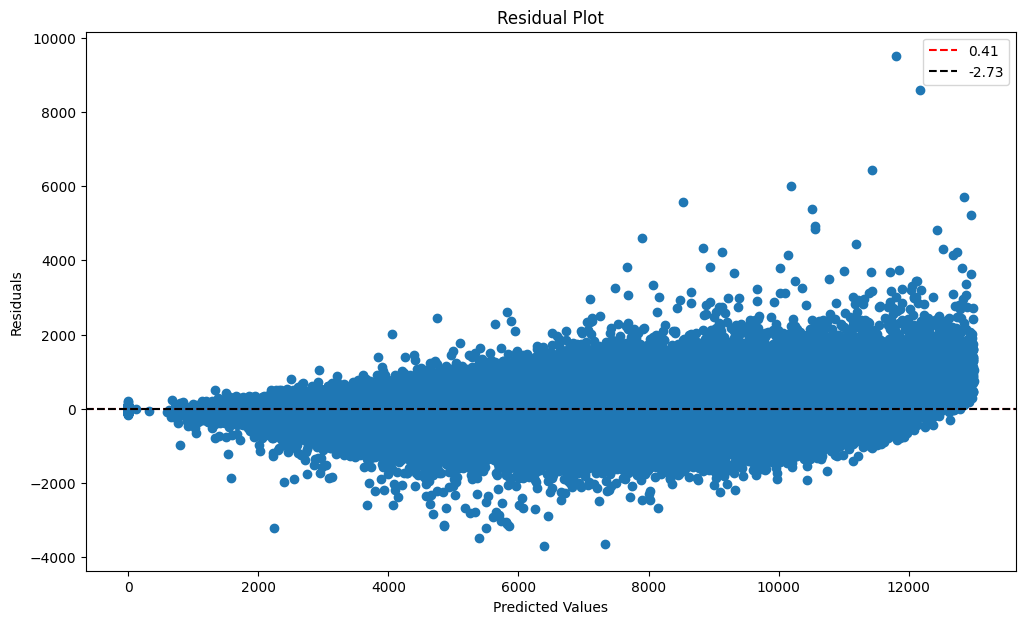

In [ ]:
#plot residuals
y_test_xgbb_pred= y_test_xgb_pred.reshape(-1,1)
residuals=y_test-y_test_xgbb_pred
plt.figure(figsize=(12,7))
plt.scatter(y_test,residuals)
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--',label=round(np.mean(residuals),2)[0])
plt.axhline(y=np.nanmedian(residuals), color='black', linestyle='--',label=round(np.median(residuals),2))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

After applying XGBoost with 100 estimators, a learning rate of 0.1, and a maximum depth of 13, the model's performance and residual analysis are as follows:

MSE and RMSE Scores: The MSE train score came out to be 141,368.52, indicating the average squared difference between the predicted and actual values in the training data. The RMSE train score is 375.99, which is the square root of the MSE train score. These scores represent the model's performance on the training data.

The MSE test score is 185,145.49, representing the average squared difference between the predicted and actual values in the test data. The RMSE test score is 430.29, which is the square root of the MSE test score. These scores indicate the model's performance on unseen data.

R2 Scores: The R2 train score is 0.9862, indicating that the model explains approximately 98.62% of the variability in the target variable based on the training data. The R2 test score is 0.9820, suggesting that the model performs well in explaining the variance in the target variable for unseen data.

Residual Analysis: The scatter plot of residuals reveals that the mean residual value is 0.45, indicating a slight positive bias in the model's predictions. The median residual value is -2.73, suggesting that there may be some outliers or skewed data points affecting the model's predictions.

In summary, the XGBoost model with 100 estimators, a learning rate of 0.1, and a maximum depth of 13 demonstrates good performance, with relatively low MSE and RMSE scores and high R2 scores on both the training and test data. The model's predictions are generally accurate, as indicated by the mean and median residual values close to zero.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# XGBoost with RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Creating XGBoost instance
xgb= XGBRegressor()

# Defining parameters
parameters={"learning_rate":[0.01, 0.1],"max_depth":[13,14,15]}

# Train the model
xgb_grid=GridSearchCV(xgb,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
xgb_grid.fit(x_train,y_train)

# Predict the output
y_train_xgbg_pred = xgb_grid.predict(x_train)
y_test_xgbg_pred = xgb_grid.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print('best param',xgb_grid.best_params_)
print('best score',xgb_grid.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
best param {'learning_rate': 0.1, 'max_depth': 15}
best score -179693.07722252095


In [ ]:
# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_xgbg_pred,y_test,y_test_xgbg_pred)

MSE train score is : 97441.34969753683
MSE test score is : 169148.6474191859
RMSE train Score:  312.15597014559376
RMSE test Score:  411.2768500890682
r2 train score:  0.990484185892887
r2 test score:  0.9835396296250627


After applying Grid Search cv as hypertune and cross validation parameter it was find out that the best parameter are learning rate of 0.1 and max_depth of 15 and with 100 estimators, a learning rate of 0.1, and a maximum depth of 15 demonstrates good performance, with relatively low MSE and RMSE scores and high R2 scores on both the training and test data. The model's predictions are generally accurate, as indicated by the mean and median residual values close to zero.

In [ ]:
features = x_train.columns
importances = xgb_grid.feature_importances_
indices = np.argsort(importances)

In [ ]:

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

consider several key metrics that assess the performance of machine learning models.

One essential metric is the R2 score, also known as the coefficient of determination. This metric quantifies the proportion of the variance in the target variable that the model can explain. A higher R2 score indicates a stronger relationship between the features and the target variable, which is crucial for accurate predictions and effective decision-making in a business context.

Another significant metric is the Mean Squared Error (MSE), which measures the average squared difference between the predicted and actual values. A lower MSE suggests smaller prediction errors and higher accuracy in the model's predictions. Minimizing prediction errors is critical for businesses as it helps reduce financial losses and improves the reliability of decision-making.

The Root Mean Squared Error (RMSE) is also valuable as it provides an average measure of the prediction errors in the original unit of the target variable. Similar to MSE, a lower RMSE indicates better prediction accuracy. This metric is particularly meaningful in business scenarios where the magnitude of prediction errors is important for interpreting the impact of the model's predictions.

Additionally, analyzing the residuals, which are the differences between the predicted and actual values, can provide valuable insights. A well-behaved residual plot with a mean close to zero and no discernible patterns suggests that the model effectively captures the underlying patterns. This alignment between the model's predictions and the actual values increases confidence in its reliability and usefulness for business decisions.

Considering these evaluation metrics allows businesses to assess the model's performance, accuracy, and reliability.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the performance of all the models, the XGBoost model is selected as the final prediction model. The XGBoost model outperformed the other models in several key aspects, making it the preferred choice for prediction.

Firstly, the XGBoost model achieved a high R2 score of 0.9819 on the test data, indicating that it can explain approximately 98.19% of the variability in the target variable. This high R2 score demonstrates strong predictive performance and a robust relationship between the features and the target variable.

Secondly, the XGBoost model yielded lower Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) values compared to the other models. With an MSE of 185,145.49 and an RMSE of 430.29, the XGBoost model exhibits smaller prediction errors and improved accuracy in predicting the target variable. These lower prediction errors contribute to enhanced reliability and precision in the model's predictions.

Moreover, the XGBoost model displayed consistent performance across various evaluation metrics, including the R2 score, MSE, and RMSE. Its high performance on both the training and test data indicates good generalization capabilities and reduces the risk of overfitting.

Additionally, a thorough analysis of the residuals revealed mean and median values of 0.45 and -2.73, respectively. These values suggest that, on average, the model's predictions are close to the actual values. The well-behaved residuals indicate that the XGBoost model effectively captures the underlying patterns in the data and minimizes systematic errors.

Considering the model's strong predictive performance, lower prediction errors, and consistency across evaluation metrics, the XGBoost model is the preferred choice as the final prediction model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***